In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
data_folder = 'expr_data'

In [3]:
import time
t = time.time()

## Environment Setup (for Colab)

In [ ]:
from datetime import datetime

os.chdir('/content')
current_time = datetime.utcnow().isoformat().replace(':', '_')
os.makedirs(os.path.join(current_time))
os.chdir(f'./{current_time}')
WORKSPACE = 'anonify'

!git clone https://github.com/lng-ng/anonify.git

os.chdir(f'./{WORKSPACE}')

!pip install bigtree

## Run the experiment

In [4]:
import numpy as np
import pandas as pd
import os
import tqdm
import matplotlib.pyplot as plt

from stratified_sampling import random_deletion
from utils.stats import get_stats

In [5]:
# Load datasets
load_path_anonymized = os.path.join(data_folder, 'diabetes_anonymized_arx250.csv')
load_path_original = os.path.join(data_folder, 'diabetes_prediction_dataset.csv')

dfo = pd.read_csv(load_path_original)
df = pd.read_csv(load_path_anonymized)

qids = ['gender', 'age', 'bmi']
ages = np.arange(0, 110, 20)
qid_ticks = {
    'gender': ['Female', 'Male'],
    'age': [pd.Interval(ages[i], ages[i + 1], closed='left') for i in range(len(ages) - 1)],
    'bmi': [pd.Interval(10, 30, closed='left'), pd.Interval(30, 50, closed='left')],
}
cat_sas = ['diabetes', 'hypertension', 'heart_disease', 'smoking_history']
numerical_sas = ['HbA1c_level', 'blood_glucose_level']
sa_ticks = {}
for val in cat_sas:
    sa_ticks[val] = df[val].unique()

dfs = {
    'Original Dataset': dfo,
    'Only K-Anonymity': df
}
p = 0.5
print("-- Sampling the dataset 10 times --")
for i in tqdm.tqdm(range(10)):
    sampled_df = random_deletion(df, p, qids)
    dfs[f'Random Deletion {i}'] = sampled_df

-- Sampling the dataset 10 times --


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.09it/s]


### Figure 7: The average blood glucose level within different age ranges (𝑘=250, Sampling percentage=50%)

In [6]:
qid = 'age'
sa = 'blood_glucose_level'
stats = get_stats(dfs, qid, sa, qid_ticks, sa_ticks, sa in cat_sas)
stats

,Original Dataset,Only K-Anonymity,Random Deletion 0,Random Deletion 1,Random Deletion 2,Random Deletion 3,Random Deletion 4,Random Deletion 5,Random Deletion 6,Random Deletion 7,Random Deletion 8,Random Deletion 9,Random Deletion (average)
age,,,,,,,,,,,,,
"[0, 20)",133.067521,133.060641,133.208532,133.191821,133.271746,132.539651,133.004360,132.990866,133.034876,132.866514,132.884783,133.266452,133.025960
"[20, 40)",134.136760,134.033378,133.969063,134.226504,133.976112,134.052867,134.181313,134.252036,134.657581,134.058976,134.252271,134.121006,134.174773
"[40, 60)",138.766345,138.677818,138.614856,138.978404,138.799656,138.400413,138.861967,138.725860,139.074759,138.880605,138.779436,138.667882,138.778384
"[60, 80)",145.580992,145.424321,144.940230,145.563246,145.461554,145.528069,145.345024,145.740687,145.493203,145.653523,145.290236,145.362250,145.437802
"[80, 100)",143.810176,143.819266,144.449590,144.785536,143.732811,144.724261,142.950125,144.295689,143.898112,143.517991,143.889206,144.271108,144.051443


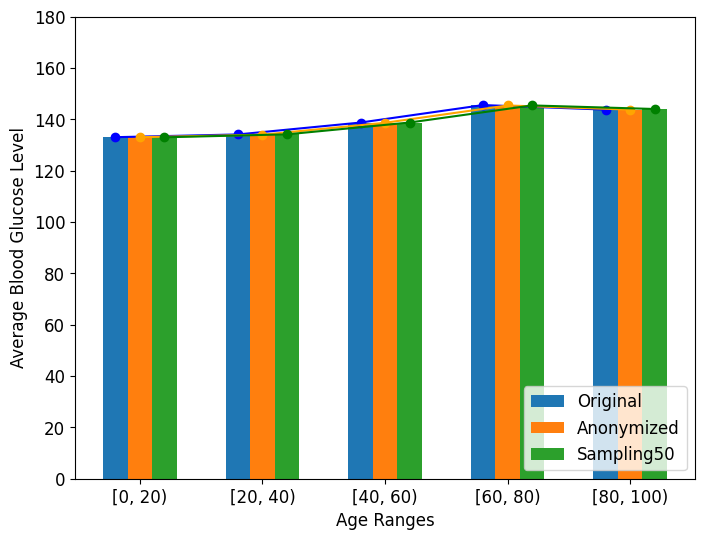

In [7]:
# Age ranges
age_ranges = ['[0, 20)', '[20, 40)', '[40, 60)', '[60, 80)', '[80, 100)']

# Data for each age range
original = stats['Original Dataset']
k_anonymity = stats['Only K-Anonymity']
random_deletion_average = stats['Random Deletion (average)']

# Set the width of the bars
bar_width = 0.2

# Create an array of age range positions for the x-axis
age_range_positions = range(len(age_ranges))

plt.figure(figsize=(8, 6))
# Create the grouped bar chart
original_bars = plt.bar(age_range_positions, original, bar_width, label='Original')
anonymized_bars = plt.bar([x + bar_width for x in age_range_positions], k_anonymity, bar_width, label='Anonymized')
sampling50_bars = plt.bar([x + 2 * bar_width for x in age_range_positions], random_deletion_average, bar_width, label='Sampling50')

# Calculate the centers of the bars
original_centers = [rect.get_x() + rect.get_width() / 2 for rect in original_bars]
anonymized_centers = [rect.get_x() + rect.get_width() / 2 for rect in anonymized_bars]
sampling50_centers = [rect.get_x() + rect.get_width() / 2 for rect in sampling50_bars]

# Draw lines connecting the centers of bars
plt.plot(original_centers, original, marker='o', color='blue')
plt.plot(anonymized_centers, k_anonymity, marker='o', color='orange')
plt.plot(sampling50_centers, random_deletion_average, marker='o', color='green')

# Set x-axis labels
plt.xticks([x + bar_width for x in age_range_positions], age_ranges, fontsize=12)
plt.yticks(fontsize=12)

# Set the chart labels and title
plt.xlabel('Age Ranges',fontsize=12)
plt.ylabel('Average Blood Glucose Level',fontsize=12)

# Add a legend
plt.legend(loc='lower right',fontsize=12)

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

plt.ylim(0, 180)
# Show the plot
#plt.grid(True)
# Show the plot
plt.show()


### Figure 8: The average number of people with hypertension within different gender groups (𝑘=250, Sampling percentage=50%)

In [8]:
qid = 'gender'
sa = 'hypertension'
stats = get_stats(dfs, qid, sa, qid_ticks, sa_ticks, sa in cat_sas)
plot_data = stats[stats.index.isin([1], level=1)]
plot_data

,,Original Dataset,Only K-Anonymity,Random Deletion 0,Random Deletion 1,Random Deletion 2,Random Deletion 3,Random Deletion 4,Random Deletion 5,Random Deletion 6,Random Deletion 7,Random Deletion 8,Random Deletion 9,Random Deletion (average)
gender,hypertension,,,,,,,,,,,,,
Female,1,4197,4197.0,2085.0,2106.0,2108.0,2093.0,2123.0,2090.0,2089.0,2141.0,2057.0,2141.0,2103.3
Male,1,3288,3288.0,1640.0,1632.0,1642.0,1640.0,1600.0,1644.0,1574.0,1648.0,1615.0,1648.0,1628.3


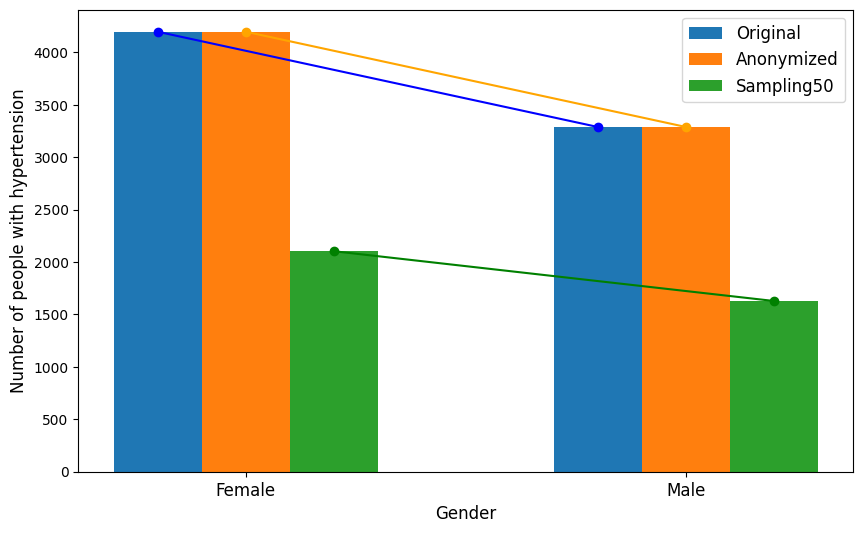

In [9]:

# Gender categories
genders = ['Female', 'Male']

# Data for each gender (hypertension=1)
hypertension_1_original = plot_data['Original Dataset']
hypertension_1_k_anonymity = plot_data['Only K-Anonymity']
hypertension_1_random_deletion_average = plot_data['Random Deletion (average)']

# Set the width of the bars
bar_width = 0.2

# Create an array of gender positions for the x-axis
gender_positions = np.arange(len(genders))

# Create the grouped bar chart for hypertension=1
plt.figure(figsize=(10, 6))
hypertension_1_original_bars = plt.bar(gender_positions - bar_width, hypertension_1_original, bar_width, label='Original')
hypertension_1_k_anonymity_bars = plt.bar(gender_positions, hypertension_1_k_anonymity, bar_width, label='Anonymized')
hypertension_1_random_deletion_average_bars = plt.bar(gender_positions + bar_width, hypertension_1_random_deletion_average, bar_width, label='Sampling50')

# Calculate the centers of the bars for hypertension=1
hypertension_1_original_centers = [rect.get_x() + rect.get_width() / 2 for rect in hypertension_1_original_bars]
hypertension_1_k_anonymity_centers = [rect.get_x() + rect.get_width() / 2 for rect in hypertension_1_k_anonymity_bars]
hypertension_1_random_deletion_average_centers = [rect.get_x() + rect.get_width() / 2 for rect in hypertension_1_random_deletion_average_bars]

# Draw lines connecting the centers of bars for hypertension=1
plt.plot(hypertension_1_original_centers, hypertension_1_original, marker='o', color='blue')
plt.plot(hypertension_1_k_anonymity_centers, hypertension_1_k_anonymity, marker='o', color='orange')
plt.plot(hypertension_1_random_deletion_average_centers, hypertension_1_random_deletion_average, marker='o', color='green')

# Set x-axis labels
plt.xticks(gender_positions, genders, fontsize=12)

# Set the chart labels and title for hypertension=1
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of people with hypertension', fontsize=12)

# Add a legend for hypertension=1
plt.legend(fontsize=12)

# Show the plot for hypertension=1
plt.show()


### Figure 9: The average number of people with diabetes within different age ranges (𝑘=250, Sampling percentage=50%)

In [10]:
qid = 'age'
sa = 'diabetes'
stats = get_stats(dfs, qid, sa, qid_ticks, sa_ticks, sa in cat_sas)
plot_data = stats[stats.index.isin([1], level=1)]
plot_data

,,Original Dataset,Only K-Anonymity,Random Deletion 0,Random Deletion 1,Random Deletion 2,Random Deletion 3,Random Deletion 4,Random Deletion 5,Random Deletion 6,Random Deletion 7,Random Deletion 8,Random Deletion 9,Random Deletion (average)
age,diabetes,,,,,,,,,,,,,
"[0, 20)",1,106,102,51,51,52,54,44,55,52,48,51,57,51.5
"[20, 40)",1,604,569,277,298,278,289,267,291,292,299,305,269,286.5
"[40, 60)",1,2858,2786,1384,1418,1394,1355,1421,1373,1415,1421,1411,1419,1401.1
"[60, 80)",1,3908,3836,1908,1862,1941,1932,1931,1895,1900,1893,1912,1942,1911.6
"[80, 100)",1,1024,1023,509,513,503,512,497,533,515,512,522,516,513.2


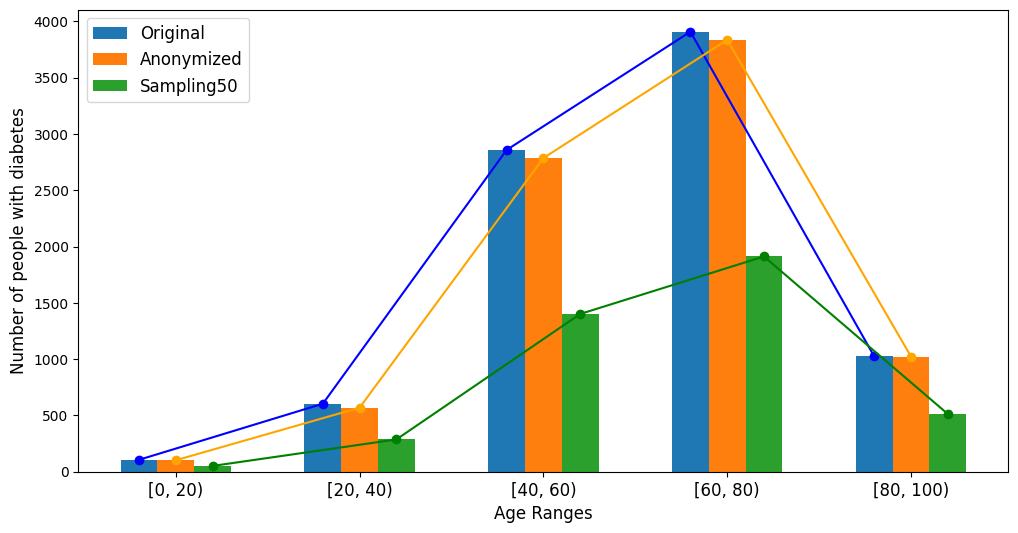

In [11]:
# Age ranges
age_ranges = ['[0, 20)', '[20, 40)', '[40, 60)', '[60, 80)', '[80, 100)']

# Data for each age range (diabetes=1)
diabetes_1_original = plot_data['Original Dataset']
diabetes_1_k_anonymity = plot_data['Only K-Anonymity']
diabetes_1_random_deletion_average = plot_data['Random Deletion (average)']

# Set the width of the bars
bar_width = 0.2

# Create an array of age range positions for the x-axis
age_range_positions = np.arange(len(age_ranges))

# Create the grouped bar chart for diabetes=1
plt.figure(figsize=(12, 6))
diabetes_1_original_bars = plt.bar(age_range_positions - bar_width, diabetes_1_original, bar_width, label='Original')
diabetes_1_k_anonymity_bars = plt.bar(age_range_positions, diabetes_1_k_anonymity, bar_width, label='Anonymized')
diabetes_1_random_deletion_average_bars = plt.bar(age_range_positions + bar_width, diabetes_1_random_deletion_average, bar_width, label='Sampling50')

# Calculate the centers of the bars for diabetes=1
diabetes_1_original_centers = [rect.get_x() + rect.get_width() / 2 for rect in diabetes_1_original_bars]
diabetes_1_k_anonymity_centers = [rect.get_x() + rect.get_width() / 2 for rect in diabetes_1_k_anonymity_bars]
diabetes_1_random_deletion_average_centers = [rect.get_x() + rect.get_width() / 2 for rect in diabetes_1_random_deletion_average_bars]

# Draw lines connecting the centers of bars for diabetes=1
plt.plot(diabetes_1_original_centers, diabetes_1_original, marker='o', color='blue')
plt.plot(diabetes_1_k_anonymity_centers, diabetes_1_k_anonymity, marker='o', color='orange')
plt.plot(diabetes_1_random_deletion_average_centers, diabetes_1_random_deletion_average, marker='o', color='green')

# Set x-axis labels
plt.xticks(age_range_positions, age_ranges, fontsize=12)

# Set the chart labels and title for diabetes=1
plt.xlabel('Age Ranges', fontsize=12)
plt.ylabel('Number of people with diabetes', fontsize=12)
#plt.title('Grouped Bar Chart (Diabetes=1) by Age Ranges')

# Add a legend for diabetes=1
plt.legend(loc='upper left', fontsize=12)

# Show the plot for diabetes=1
plt.show()


In [12]:
# cleanup data folder
#import shutil
#shutil.rmtree(data_folder)

In [13]:
print(f"Time taken: {time.time() - t}")

Time taken: 57.92652726173401
